In [138]:
import numpy as np

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel, Matern
import matplotlib.pyplot as plt
import random
from copy import deepcopy

import statsmodels.api as sm
from scipy.integrate import quad

In [297]:
def generate_fourier_random_function(domain_min, domain_max, n_terms=5):
    """Generate random function using Fourier series and normalize"""
    L = domain_max - domain_min
    
    # Generate random coefficients
    a0 = np.random.randn()
    a_coeffs = np.random.randn(n_terms)
    b_coeffs = np.random.randn(n_terms)
    
    def raw_function(x):
        result = a0/2
        for n in range(1, n_terms+1):
            result += a_coeffs[n-1] * np.cos(2*n*np.pi*x/L)
            result += b_coeffs[n-1] * np.sin(2*n*np.pi*x/L)
        return result
    
    # Make non-negative (using softplus)
    def positive_function(x):
        return np.log(1 + np.exp(raw_function(x)))
    
    # Normalize
    integral, _ = quad(positive_function, domain_min, domain_max)
    
    def normalized_function(x):
        return positive_function(x) / integral
    
    return normalized_function

# Example usage
fourier_func = generate_fourier_random_function(0, 1)
#print(f"Integral: {quad(fourier_func, 0, 1)[0]}")  # Should be 1

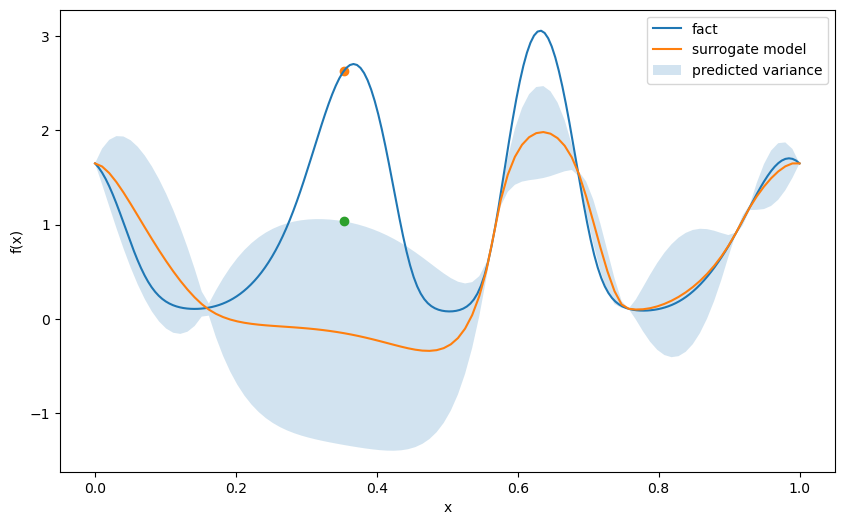

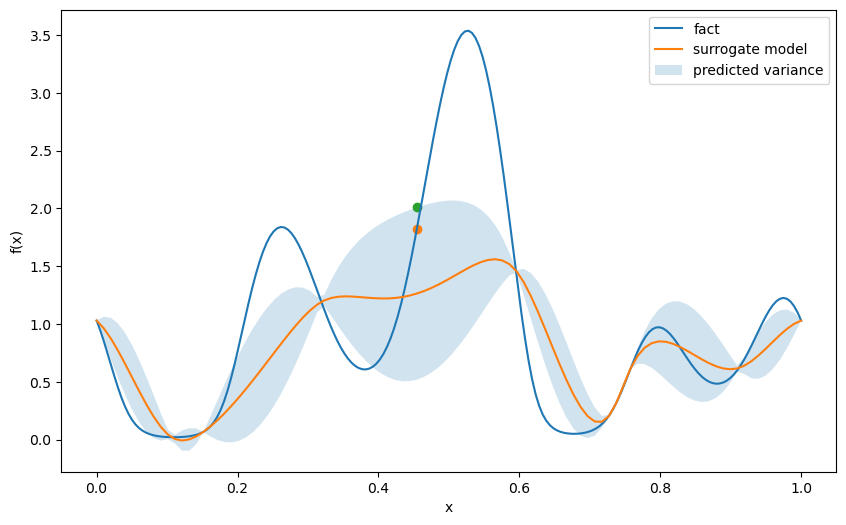

/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/_gpr.py:659: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


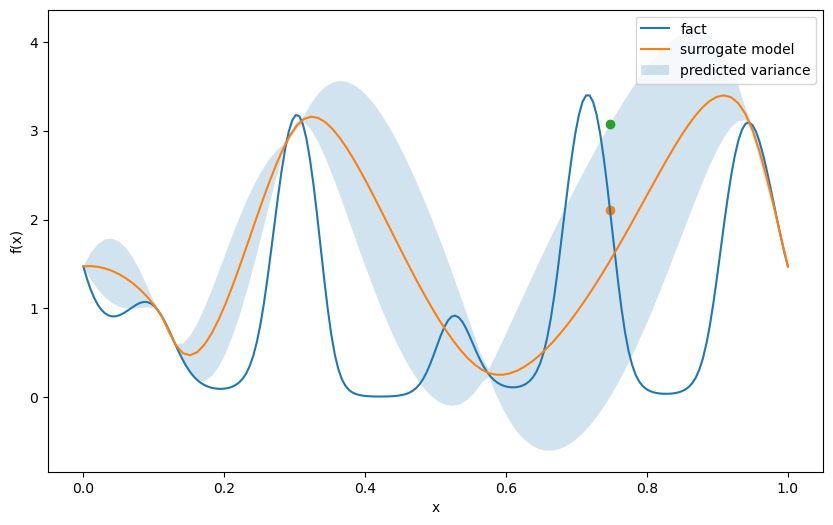

/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/_gpr.py:659: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/_gpr.py:659: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


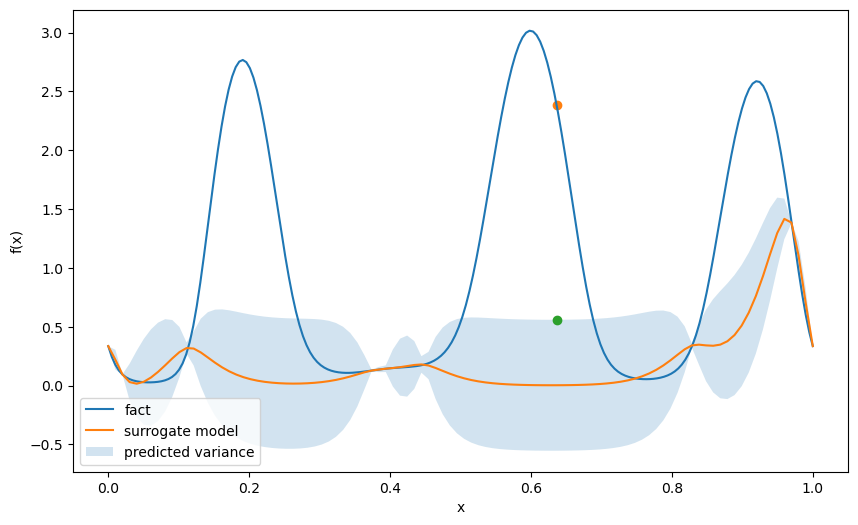

/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/_gpr.py:659: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/_gpr.py:659: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


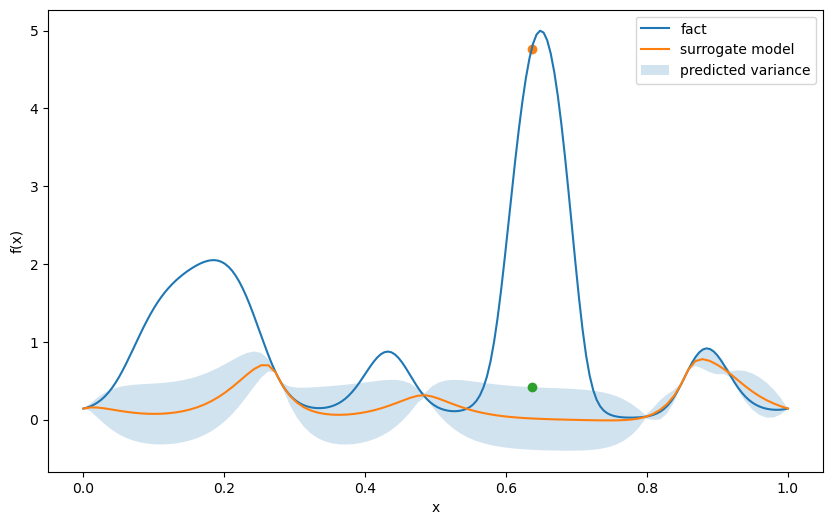

/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/_gpr.py:659: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/_gpr.py:659: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/_gpr.py:659: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/

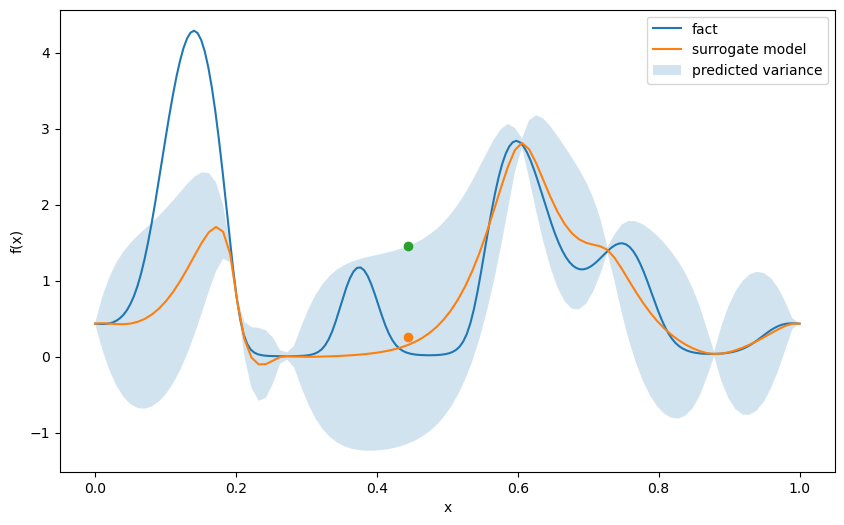

/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/_gpr.py:659: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/_gpr.py:659: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


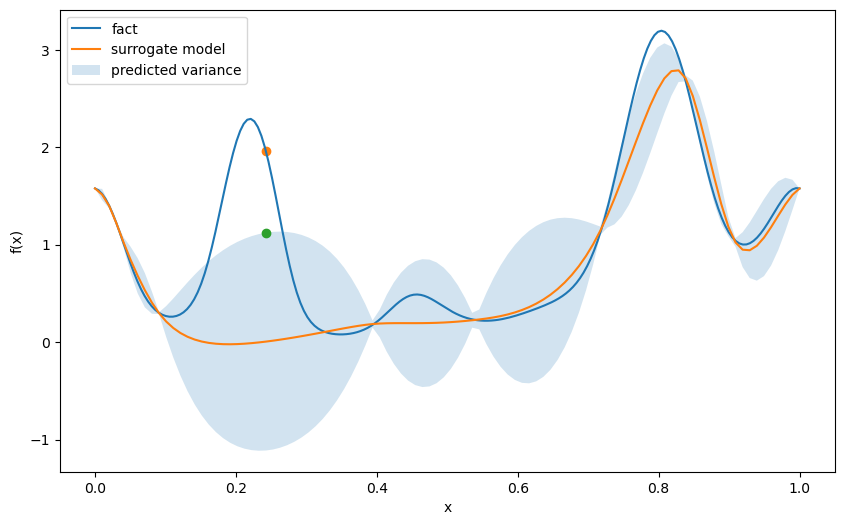

/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/_gpr.py:659: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


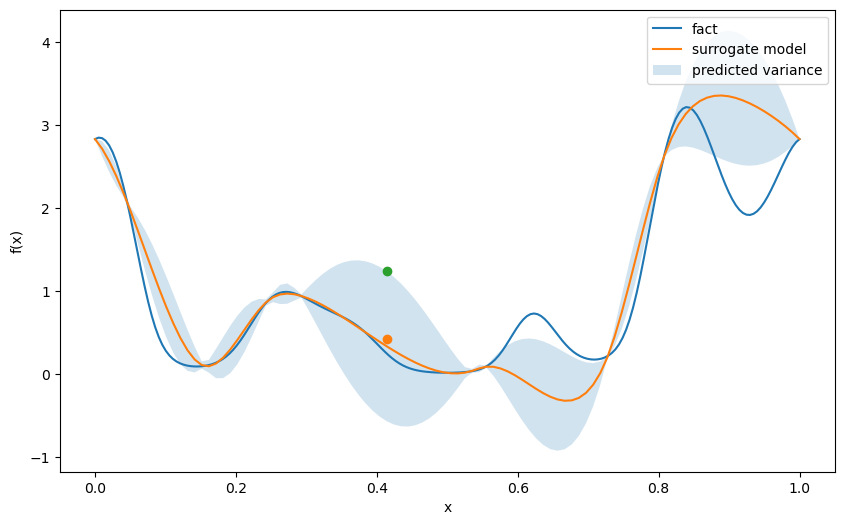

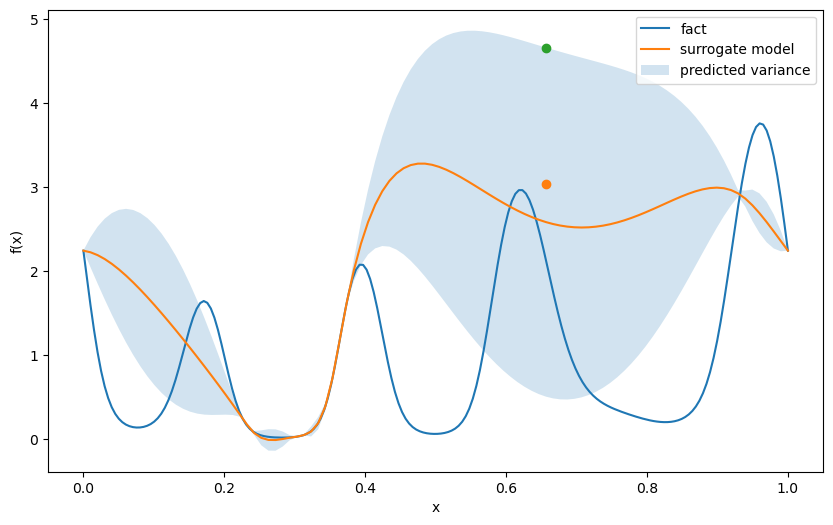

/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/_gpr.py:659: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/_gpr.py:659: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/_gpr.py:659: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/

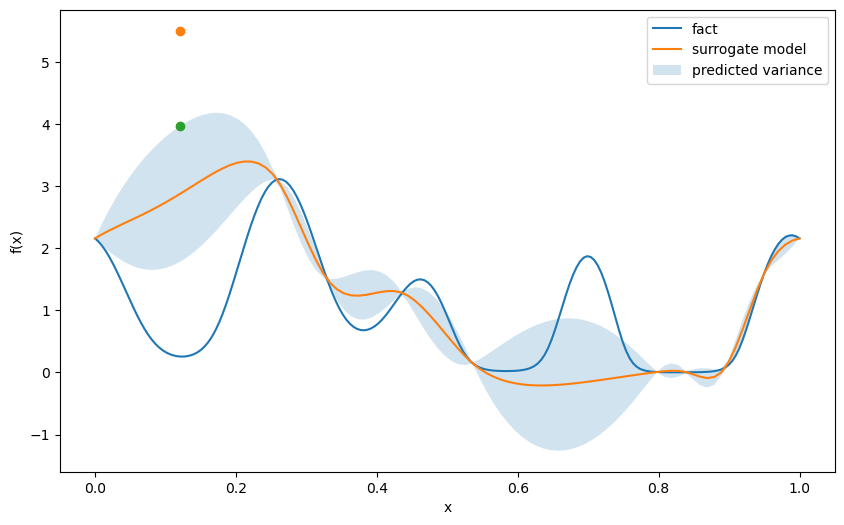

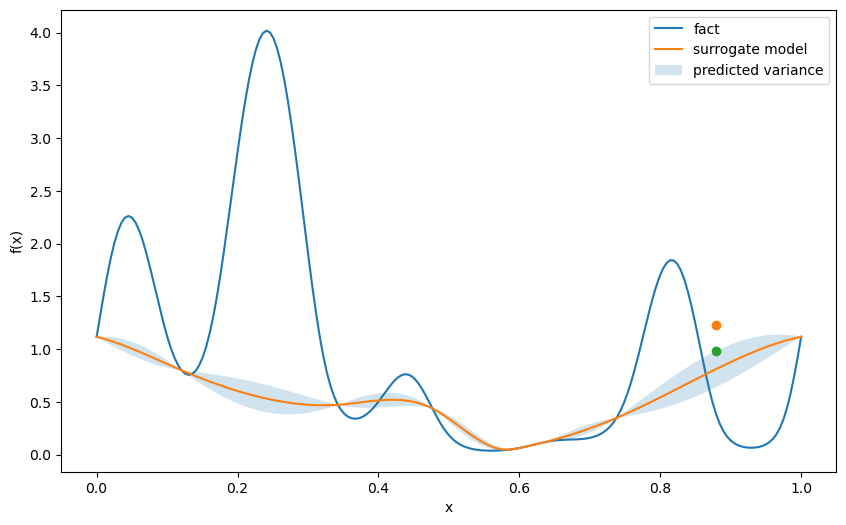

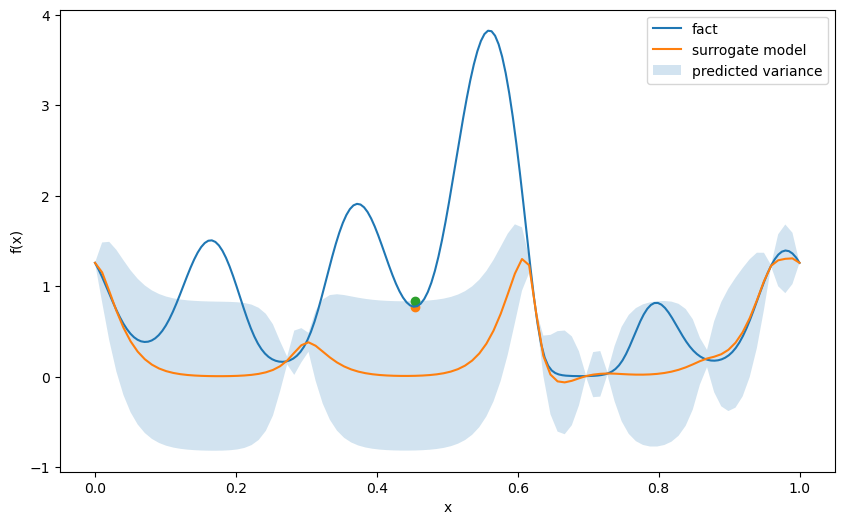

/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/_gpr.py:659: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/_gpr.py:659: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


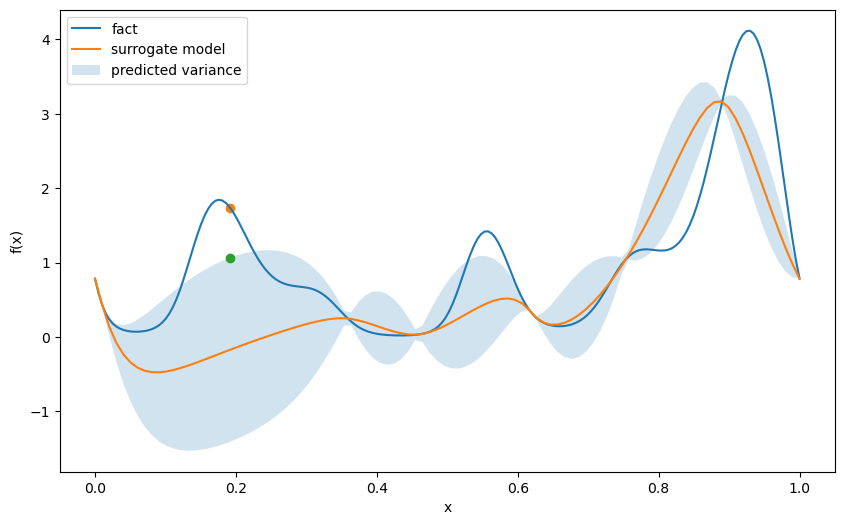

/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/_gpr.py:659: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/_gpr.py:659: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


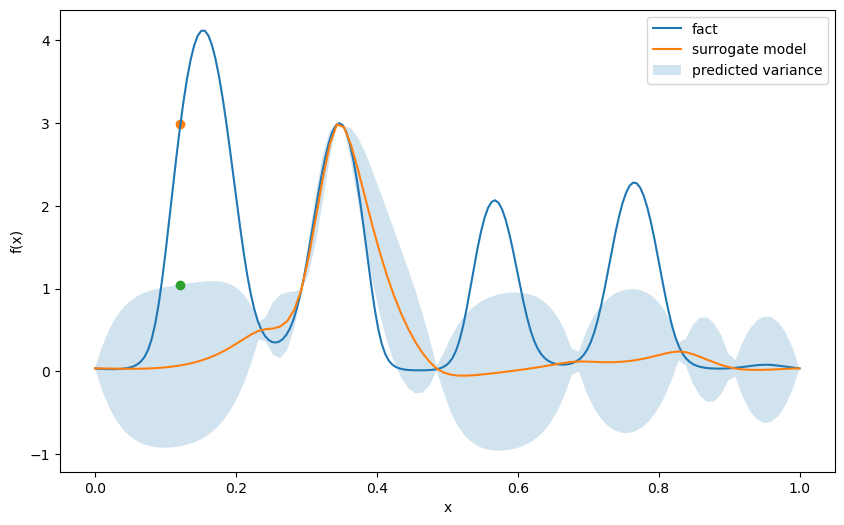

/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/_gpr.py:659: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


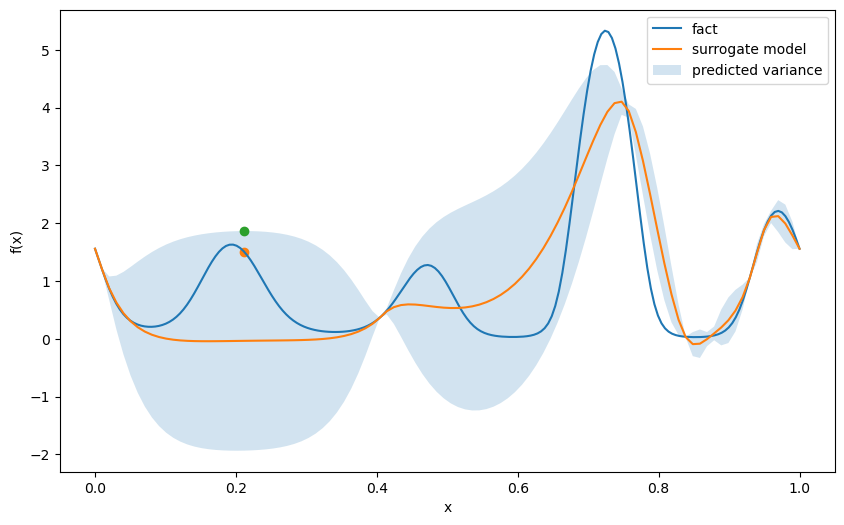

/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/_gpr.py:659: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/_gpr.py:659: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/_gpr.py:659: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/

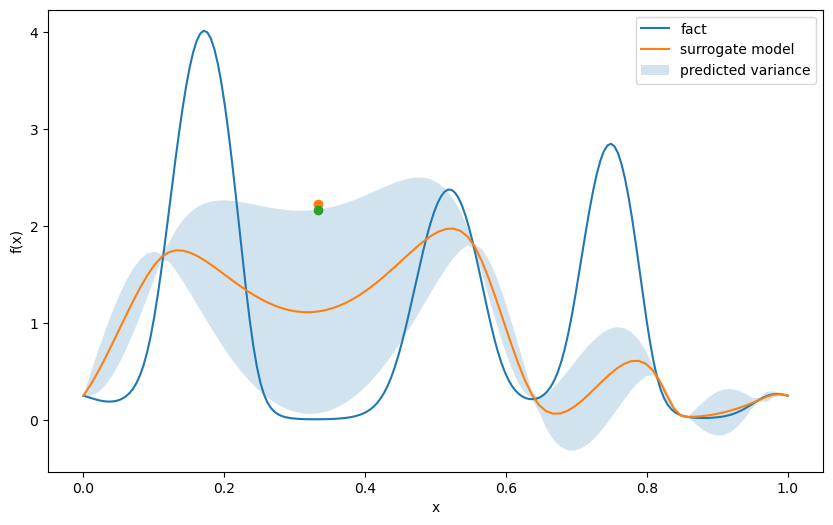

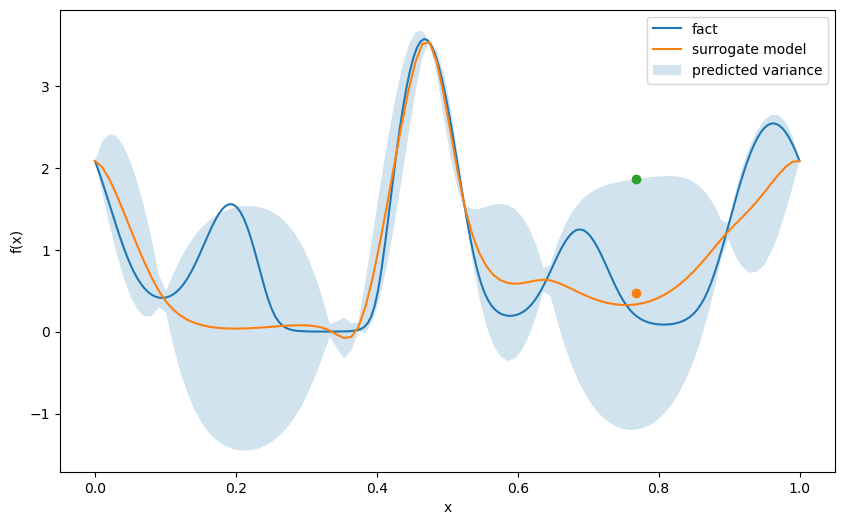

/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/_gpr.py:659: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/_gpr.py:659: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/_gpr.py:659: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/

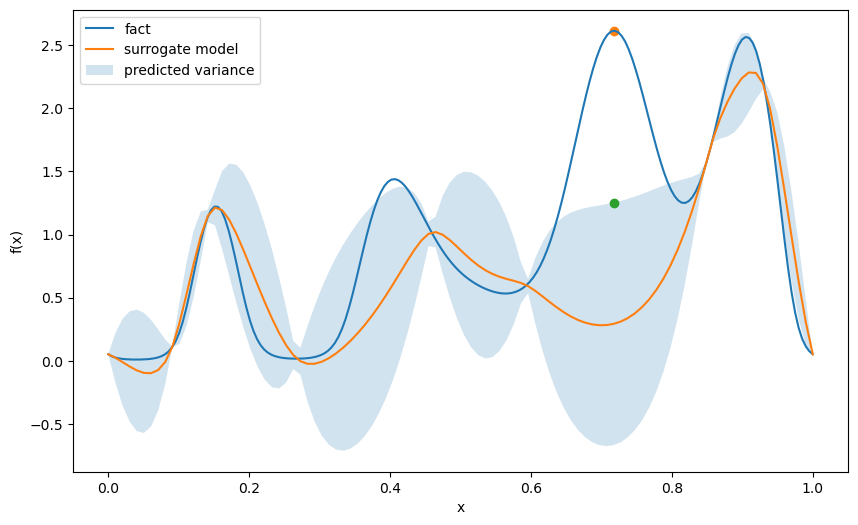

/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/_gpr.py:659: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


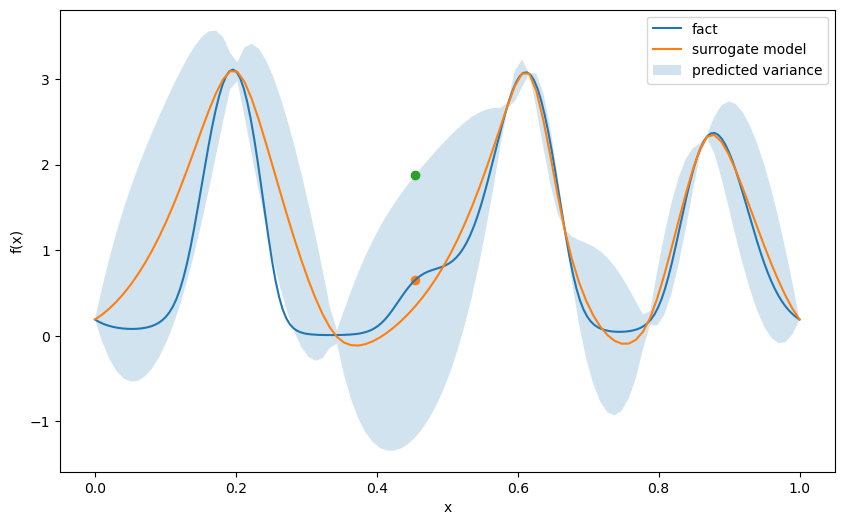

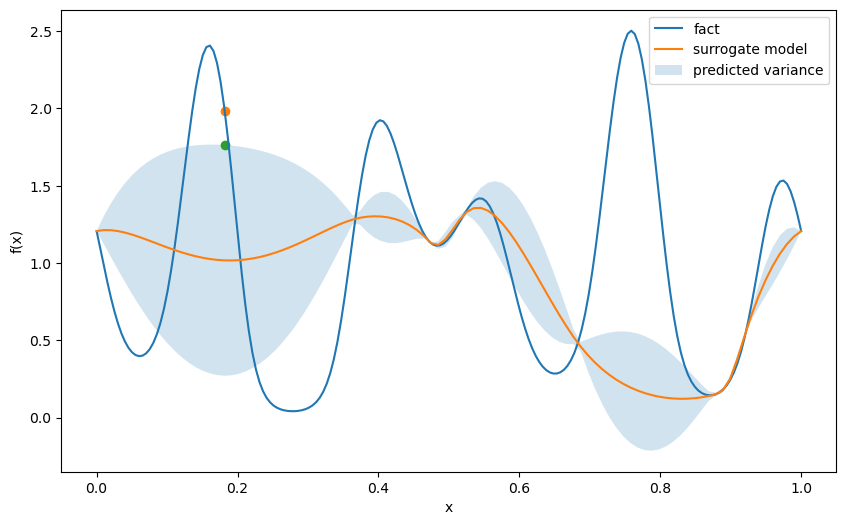

In [412]:
deltas = []
varss = []

for i in range(1000):
    F = generate_fourier_random_function(0, 1)

    grid = np.linspace(0,1,100).reshape(-1,1)
    X = np.random.random(8)
    X = np.insert(X,0,0)
    X = np.insert(X,9,1).reshape(-1,1)
    y = []
    for g in X:
        y.append(F(g))
        
    #y = F.predict(X).reshape(-1,1)

    kernel = ConstantKernel(1)
    kernel *= Matern(
                np.array([1] * 1),
                length_scale_bounds=(1e-6, 10),
                nu=1.5,
            )
    gp = GaussianProcessRegressor(kernel=kernel,n_restarts_optimizer=200)
    gp.fit(X, y)
    
    mean,var = gp.predict(grid,return_std = True)
    fact = F(grid[np.argmax(var)])

    deltas.append(np.sqrt((fact - mean[np.argmax(var)])**2))
    varss.append(var[np.argmax(var)])

    if i%50 == 0:
        fact = []
        for x in np.linspace(0,1,200):
            fact.append(F(x))
        plt.figure(figsize=(10, 6))    
        m,s = gp.predict(grid,return_std = True)
        plt.plot(np.linspace(0,1,200),fact,label = 'fact')
        plt.plot(np.linspace(0,1,100),m,label = 'surrogate model')
        plt.fill_between(np.linspace(0,1,100),m-s,m+s,alpha=0.2,label = 'predicted variance')
        plt.scatter(grid[np.argmax(var)],m[np.argmax(var)]+deltas[-1])
        plt.scatter(grid[np.argmax(var)],m[np.argmax(var)]+varss[-1])
        plt.legend()
        plt.xlabel("x")
        plt.ylabel("f(x)")
        plt.show()

        

In [350]:
deltas_test = []
varss_test = []

for i in range(100):
    F = generate_fourier_random_function(0, 1)

    grid = np.linspace(0,1,100).reshape(-1,1)
    X = np.random.random(8)
    X = np.insert(X,0,0)
    X = np.insert(X,9,1).reshape(-1,1)
    y = []
    for g in X:
        y.append(F(g))
        
    #y = F.predict(X).reshape(-1,1)

    kernel = ConstantKernel(1)
    kernel *= Matern(
                np.array([1] * 1),
                length_scale_bounds=(1e-6, 10),
                nu=1.5,
            )
    gp = GaussianProcessRegressor(kernel=kernel,n_restarts_optimizer=200)
    gp.fit(X, y)
    
    mean,var = gp.predict(grid,return_std = True)
    fact = F(grid[np.argmax(var)])

    deltas_test.append(np.sqrt((fact - mean[np.argmax(var)])**2))
    varss_test.append(var[np.argmax(var)])

/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/_gpr.py:659: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


In [414]:
deltas = np.array(deltas).flatten()
varss = np.array(varss).flatten()

In [416]:
deltas_test = np.array(deltas_test).flatten()
varss_test = np.array(varss_test).flatten()

# OLS

In [448]:
results = sm.OLS(varss,sm.add_constant(deltas)).fit()

mse = mean_squared_error(results.params[0]+results.params[1]*deltas_test, varss_test)
print(f"MSE: {mse:.4f}")

mse = r2_score(varss_test,results.params[0]+results.params[1]*deltas_test)
print(f"R2: {mse:.4f}")

print(results.summary())

MSE: 0.1796
R2: 0.0547
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.055
Model:                            OLS   Adj. R-squared:                  0.054
Method:                 Least Squares   F-statistic:                     58.43
Date:                Sun, 13 Apr 2025   Prob (F-statistic):           4.93e-14
Time:                        11:02:20   Log-Likelihood:                -564.18
No. Observations:                1000   AIC:                             1132.
Df Residuals:                     998   BIC:                             1142.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.2841      0.

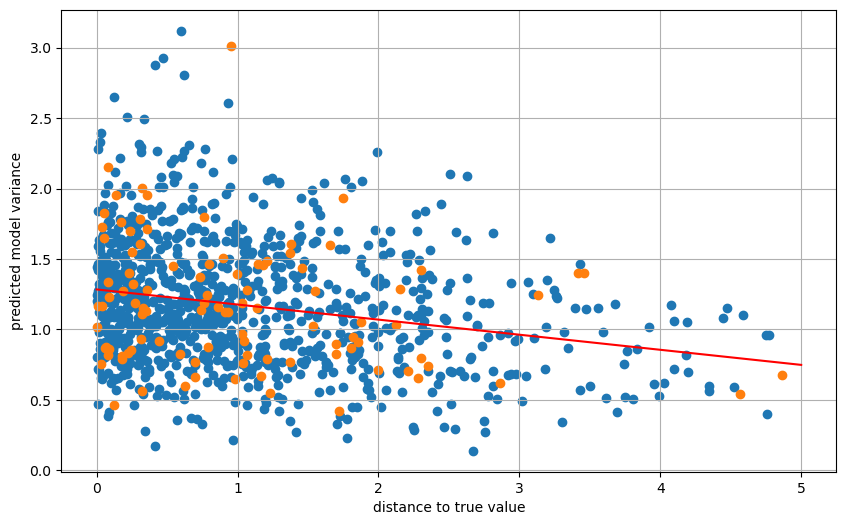

In [450]:
plt.figure(figsize=(10, 6))
plt.scatter(deltas,varss,label='train')
plt.scatter(deltas_test,varss_test,label='test')
plt.plot(np.linspace(0, 5, 10),results.params[0]+np.linspace(0, 5, 10)*results.params[1],color='red')
plt.ylabel("predicted model variance")
plt.xlabel("distance to true value")
plt.grid()

# Local OLS

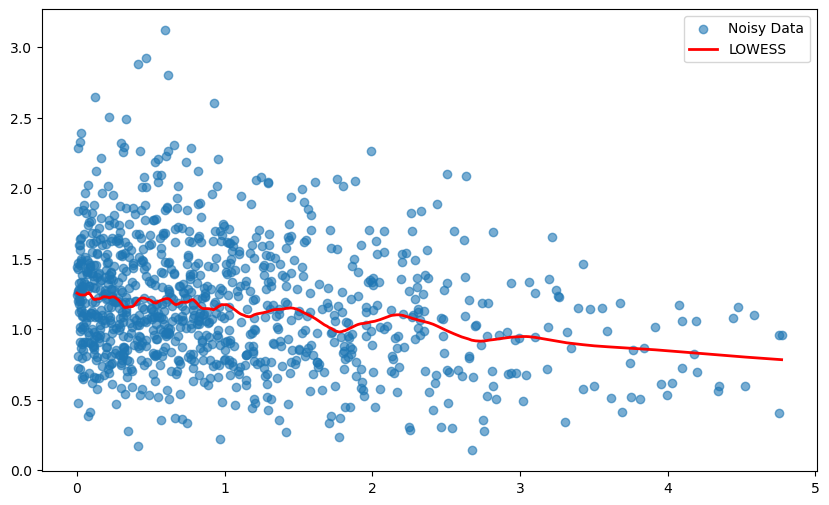

In [456]:
from statsmodels.nonparametric.smoothers_lowess import lowess

smoothed = lowess(varss,deltas, frac=0.1)  

# Plot
plt.figure(figsize=(10, 6))  
plt.scatter(deltas,varss, label='Noisy Data', alpha=0.6)
plt.plot(smoothed[:, 0], smoothed[:, 1], 'r-', label='LOWESS', lw=2)
plt.legend()
plt.show()

# CatBoostRegressor

In [472]:
import numpy as np
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import PolynomialFeatures

model = CatBoostRegressor(
    iterations=100,     
    learning_rate=0.001,   
    depth=8,           
    verbose=0           
)

poly = PolynomialFeatures(degree=1, include_bias=False)
deltas_poly = poly.fit_transform(deltas.reshape(-1,1))
deltas_poly_test = poly.fit_transform(deltas_test.reshape(-1,1))

model.fit(deltas_poly,varss.reshape(-1,1),)
y_pred = model.predict(deltas_poly_test)

mse = mean_squared_error(y_pred, varss_test)
print(f"MSE: {mse:.4f}")

r2 = r2_score(varss_test,y_pred)
print(f"R2: {r2:.4f}")

#print("Feature Importance:", model.get_feature_importance())

MSE: 0.1885
R2: 0.0079


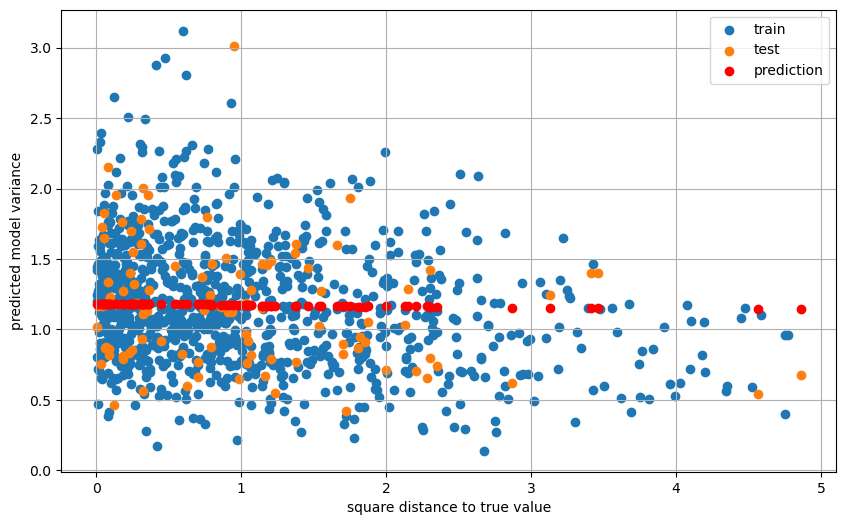

In [480]:
plt.figure(figsize=(10, 6))
plt.scatter(deltas,varss,label='train')
plt.scatter(deltas_test,varss_test,label='test')
plt.scatter(deltas_test,y_pred,color='red',label='prediction')
plt.ylabel("predicted model variance")
plt.xlabel("square distance to true value")
plt.legend()
plt.grid()

In [487]:
# import torch
# import torch.nn as nn
# import torch.optim as optim
# from torch.utils.data import DataLoader, TensorDataset
# from sklearn.model_selection import KFold
# from sklearn.metrics import mean_squared_error, r2_score
# import numpy as np
# from scipy.stats import qmc
# import time

# class NeuralNet(nn.Module):
#     def __init__(self):
#         super(NeuralNet, self).__init__()
#         self.fc1 = nn.Linear(in_features=1, out_features=16)
#         #self.fc2 = nn.Linear(in_features=16, out_features=16)
#         self.fc3 = nn.Linear(in_features=16, out_features=16)
#         self.fc4 = nn.Linear(in_features=16, out_features=1)
#         self.relu = nn.ReLU()
#         #self.softmax = nn.Softmax(dim=1)

#     def forward(self, x):
#         x = self.relu(self.fc1(x))
#         #x = self.relu(self.fc2(x))
#         x = self.relu(self.fc3(x))
#         x = self.fc4(x)
#         return x
        
# deltas = []
# varss = []

# for _ in range(10):
#     X = np.linspace(-1, 1, 50).reshape(-1, 1)
#     y = np.random.random(50) * 0.9 + 0.1
#     kernel = RBF(length_scale=3)
#     F = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=100)
#     F.fit(X, y)

    
#     X_grid = np.linspace(-1,1,100).reshape(-1,1)
#     X_train = np.linspace(-1,1,5).reshape(-1,1) 
#     y_train = F.predict(X).reshape(-1,1)

#     # mse_nn = []
#     # r2_nn = []
#     # time_nn = []

#     mods = []
    
#     for _ in range(20):
        
#         kf = KFold(n_splits=5, shuffle=True, random_state=42)

#         train_losses = []
#         val_losses = []

#         models = []

#         for fold, (train_index, val_index) in enumerate(kf.split(X_train)):
    
#             X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
#             y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

#             train_data = TensorDataset(torch.Tensor(X_train_fold), torch.Tensor(y_train_fold))
#             val_data = TensorDataset(torch.Tensor(X_val_fold), torch.Tensor(y_val_fold))

#             batch_size = 16
#             train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
#             val_loader = DataLoader(val_data, batch_size=batch_size, shuffle=False)

#             model = NeuralNet()
#             criterion =  nn.MSELoss()
#             optimizer = optim.Adam(model.parameters(), lr=0.001)

#             num_epochs = 400
#             for epoch in range(num_epochs):
#                 #model.train()
#                 running_loss = 0.0
#                 for inputs, labels in train_loader:
#                     optimizer.zero_grad()
#                     outputs = model(inputs)
#                     loss = criterion(outputs, labels)
#                     loss.backward()
#                     optimizer.step()
#                     running_loss += loss.item() * inputs.size(0)
#                 epoch_loss = running_loss / len(train_loader.dataset)
#                 train_losses.append(epoch_loss)


#             models.append(model)

    
#         preds = []
#         test_preds = []
#         grid = torch.Tensor(X_grid)
        

#         if True:
#             for m in models:
#                 preds.append(m(grid).detach().numpy())
        
#         vars = np.var(preds,axis=0)
#         a = X_grid[np.argmax(np.var(preds,axis=0))]
#         a_ = F.predict([a])
    
#         deltas.append(np.abs(a_.item() - np.mean(preds,axis=0)[np.argmax(var)]))
#         varss.append(np.max(vars))

        
#         X_train = np.append(X_train,a).reshape(-1,1)
#         y_train = np.append(y_train, a_).reshape(-1,1)

#         mods = models

In [489]:
# results = sm.OLS(deltas, varss).fit()

# print(results.summary())

In [491]:
# plt.figure(figsize=(10, 6))
# plt.scatter(varss,deltas)
# plt.plot(np.linspace(0, 0.12, 10),np.linspace(0, 0.12, 10)*results.params[0],color='red')
# plt.xlabel("predicted model variance")
# plt.ylabel("square distance to true value")
# plt.grid()